# Unique species
Visualize the numbers of unique species within and across kingdoms.

In [40]:
import json
from collections import defaultdict
import sys
sys.path.append('../citation_network/')
from classify_papers import map_specs_to_kings
import taxoniq
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read in & preprocess data

In [20]:
with open('../data/citation_network/intermediate_saves/classmains_07Jan2024/species_ids.json') as myf:
    species_ids = json.load(myf)

In [21]:
# Cast all NCBI Taxonomy IDs to integers
species_ids = {k: int(v) for k, v in species_ids.items()}

## Numbers of unique species
### Entire dataset

In [34]:
total_uniq = set(species_ids.values())
print(f'There are {len(total_uniq)} unique species mentions in the overall dataset before processing to kingdoms.')

There are 4809 unique species mentions in the overall dataset before processing to kingdoms.


### Per class

In [6]:
full_species_dict = map_specs_to_kings(species_ids)

100%|██████████| 7297/7297 [00:00<00:00, 7486.06it/s]

When building the species --> kingdom dict, 201 species were dropped because their kingdom wasn't in our list of interest, 4 were dropped because they were only identifyable as Eukaryota, and 15 because they did not appear in taxoniq's local version of NCBI Taxonomy. This could mean they are not in the actual taxonomy, or that they were added after taxoniq last updated its database version. Finally, 1 species were dropped because their lineage in the taxonomy entry was empty.


We want to disambiguate repeated species, we can do that by using their IDs:

In [30]:
unique_spec_kings = defaultdict(list)
for spec, king in full_species_dict.items():
    taxon_id = species_ids[spec]
    unique_spec_kings[king].append(taxon_id)
unique_spec_kings = {k: list(set(v)) for k, v in unique_spec_kings.items()}

In [31]:
for king, specs in unique_spec_kings.items():
    print(f'There are {len(specs)} unique database-normalized species in kingdom {king}.')

There are 2095 unique database-normalized species in kingdom Plant.
There are 1652 unique database-normalized species in kingdom Animal.
There are 542 unique database-normalized species in kingdom Microbe.
There are 293 unique database-normalized species in kingdom Fungi.


In [35]:
print(f'There are {sum([len(v) for v in unique_spec_kings.values()])} total unique species across our kingdoms of interest.')

There are 4582 total unique species across our kingdoms of interest.


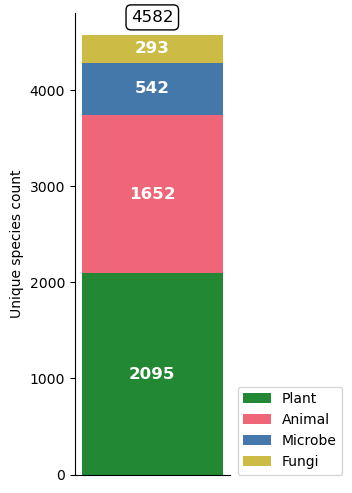

In [81]:
colors = {'Plant': '#228833', 'Animal':'#EE6677', 'Microbe': '#4477AA', 'Fungi':'#CCBB44'}
bottom = np.zeros(1)
fig, ax = plt.subplots(figsize=(2,6))
for king, specs in unique_spec_kings.items():
    count = len(specs)
    ax.bar('Dataset', count, color=colors[king], label=king, bottom=bottom)
    bottom += count
    
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        0.5*bar.get_height() + bar.get_y(),
        int(bar.get_height()),
        ha='center',
        va='center',
        color='w',
        weight='bold',
        size=12
    )
    
    centered_x = bar.get_x() + bar.get_width() / 2
    top_y = bar.get_height() + bar.get_y()

ax.text(centered_x, top_y + 100, sum([len(v) for v in unique_spec_kings.values()]), bbox={'boxstyle':'round', 'facecolor':'w'}, ha='center', va='bottom', fontsize=12)
ax.set_ylabel('Unique species count')
ax.spines[['right', 'top']].set_visible(False)
ax.get_xaxis().set_visible(False)
plt.legend(loc=(1.05,0))
plt.savefig('../data/citation_network/figures/unique_species_per_kingdom_bar.png', format='png', dpi=600, bbox_inches='tight')